# Wizualizacja danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
#%matplotlib inline

# Wczytaj dane z pliku

In [53]:
inFile = 'http://ww2.amstat.org/publications/jse/datasets/babyboom.dat.txt'
data = pd.read_csv(inFile, sep='[ ]+', header=None, engine='python',names= ['sex', 'Weight', 'Minutes'])
df = data[['Minutes', 'sex', 'Weight']]

In [70]:
df.head()

,Minutes,sex,Weight
5,5,female,3837
104,64,female,3334
118,78,male,3554
155,115,male,3838
257,177,male,3625


In [34]:
weight_rank = df.Weight.rank()
weight_rank.sort_values(ascending=False)
df['weight_rank'] = weight_rank
df.sort_values(by='weight_rank', ascending=False).head()

C:\Users\Edyta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Minutes,sex,Weight,weight_rank
1909,1149,2,4162,44.0
1256,776,2,3920,43.0
2217,1337,1,3866,42.0
155,115,2,3838,41.0
5,5,1,3837,40.0


# Narysujmy dane <tt>df.Weight.values</tt> jako szereg czasowy

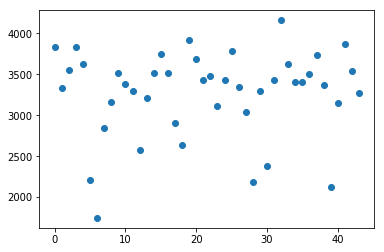

In [35]:
x=df.Weight.values
plt.scatter(np.arange(len(x)), x)
plt.show()
# x - ilość wystąpień, y - waga noworodka

In [6]:
len(x)
# tyle kropek na wykresie

44

In [7]:
pow3800 = df['Weight'] >= 3800
df[pow3800].head(10)

,Minutes,sex,Weight,weight_rank
5,5,1,3837,40.0
155,115,2,3838,41.0
1256,776,2,3920,43.0
1909,1149,2,4162,44.0
2217,1337,1,3866,42.0


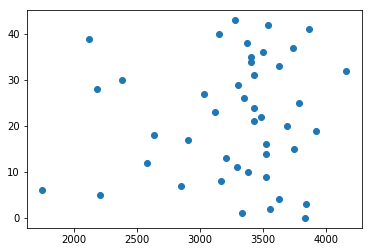

In [8]:
x=df.Weight.values
plt.scatter(x, np.arange(len(x)))
plt.show()
# odwrócenie osi            

# Narysujmy histogram dla <tt>df.Weight.values</tt>

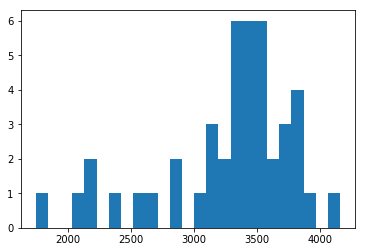

In [9]:
plt.hist(x, bins=25)
plt.show()
# bins = ile przedziałów

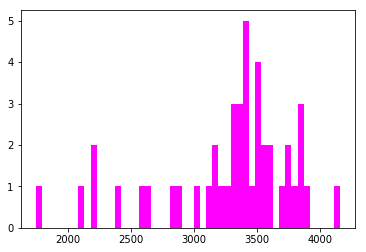

In [10]:
plt.hist(x, bins=50, color='magenta')
plt.show()

# Narysujmy gęstość dla <tt> df.Weight.values</tt> (estymacja jądrowa):

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


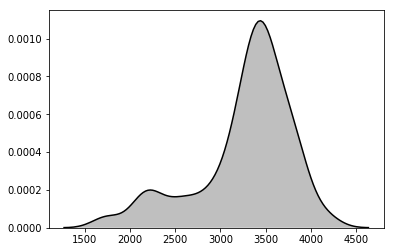

In [11]:
sns.kdeplot(x, shade=True, color='k')
plt.show()
# wygładzony histogram (dla danych 1-wymiarowych)

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


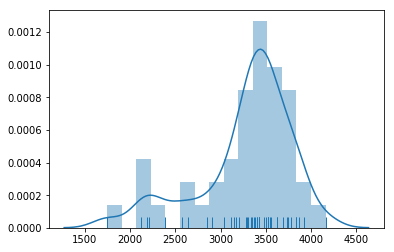

In [12]:
# dist plot = oszacowanie gęstości
sns.distplot(x, bins=15, rug=True)

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


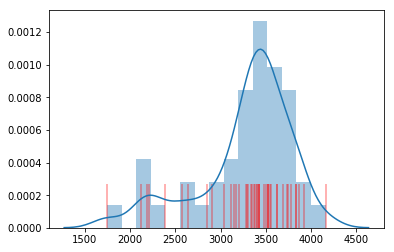

In [13]:
sns.distplot(x, bins=15, rug=True, rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.2 })

# Narysujmy dystrybuantę empiryczną dla <tt>df.Weight.values</tt>

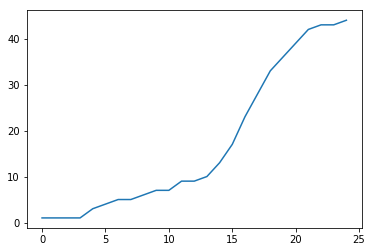

In [14]:
plt.plot(stats.cumfreq(x,numbins=25)[0])
plt.show()

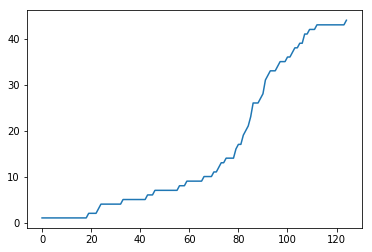

In [15]:
plt.plot(stats.cumfreq(x,numbins=125)[0])
plt.show()

# Narysujmy wykres pudełkowy dla df.Weight.values

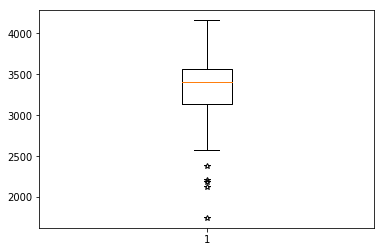

           Minutes        sex       Weight  weight_rank
count    44.000000  44.000000    44.000000     44.00000
mean    788.727273   1.590909  3275.954545     22.50000
std     416.066931   0.497350   528.032458     12.84478
min       5.000000   1.000000  1745.000000      1.00000
25%     482.750000   1.000000  3141.500000     11.75000
50%     846.500000   2.000000  3404.000000     22.50000
75%    1158.500000   2.000000  3571.750000     33.25000
max    1435.000000   2.000000  4162.000000     44.00000


In [16]:
plt.boxplot(x, sym='*')
plt.show()
print(df.describe())

# Narysujmy wykres skrzypcowy dla <tt>df.Weight.values</tt>

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


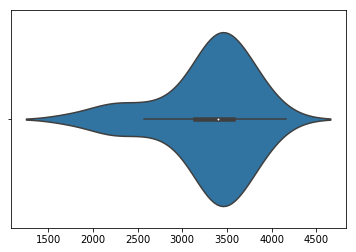

In [17]:
sns.violinplot(x)
plt.show()

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


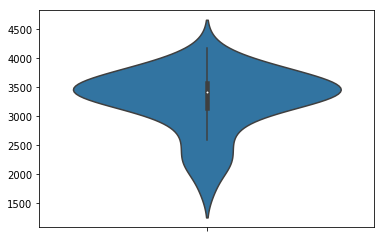

In [18]:
sns.violinplot(x,orient='v')

# Zadanie
Proszę podzielić próbkę na dwie grupy ze względu na płeć (kolumna ``sex'') i narysować dla nich:
<ul>
<li>wykres w kształcie szeregu czasowego</li>
<li>histogramy</li>
<li>estymacje gęstości</li>
<li>dystrybuanty empiryczne</li>
<li>wykresy pudełkowe</li>
<li>wykresy skrzypcowe</li>
</ul>

In [19]:
df.head()

,Minutes,sex,Weight,weight_rank
5,5,1,3837,40.0
104,64,1,3334,18.0
118,78,2,3554,33.0
155,115,2,3838,41.0
257,177,2,3625,34.0


In [54]:
# To make the plots easier to read, replace "1/2" with "female/male"
sexDict = {1 : 'female', 2: 'male'}
df['sex'].replace(sexDict, inplace=True)
df.head()

C:\Users\Edyta\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Minutes,sex,Weight
5,5,female,3837
104,64,female,3334
118,78,male,3554
155,115,male,3838
257,177,male,3625


In [28]:
# Display statistical information numerically
grouped = df.groupby('sex')
print(grouped.describe())

       Minutes                                                                \
         count        mean         std   min     25%    50%      75%     max   
sex                                                                            
female    18.0  773.000000  446.050775   5.0  507.75  846.5  1094.25  1435.0   
male      26.0  799.615385  402.687281  78.0  464.25  849.5  1177.50  1283.0   

       Weight               ...                   weight_rank             \
        count         mean  ...       75%     max       count       mean   
sex                         ...                                            
female   18.0  3132.444444  ...   3517.25  3866.0        18.0  20.305556   
male     26.0  3375.307692  ...   3628.75  4162.0        26.0  24.019231   

                                                   
              std  min    25%    50%    75%   max  
sex                                                
female  13.533335  1.0   7.25  21.25  30.25  42.0  
male    12

In [55]:
print(grouped.get_group('male').Weight.head())
print(grouped.get_group('female').Weight.head())

118    3554
155    3838
257    3625
422    2846
431    3166
Name: Weight, dtype: int64
5      3837
104    3334
405    2208
407    1745
814    2576
Name: Weight, dtype: int64


# wykres w kształcie "szeregu czasowego"

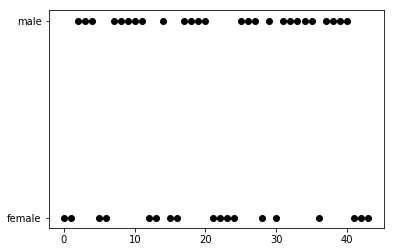

In [96]:
aaa = df.sex.values
plt.scatter(np.arange(len(aaa)), aaa, c='k')
plt.show()

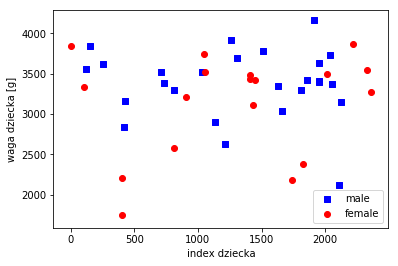

In [104]:
# miał być wykres wag, ale w 2 kolorach, osobno male, osobno female
male1 = df['sex'] == 'male'
female1 = df['sex'] == 'female'
x1 = df[male1].Weight.values
x2 = df[female1].Weight.values

plt.scatter(df[male1].index, x1, c='b', label='male', marker='s')
plt.scatter(df[female1].index, x2, c='r', label='female', marker='o')
# na osi x każda grupa numerowana osobno dlatego max 25 na skali
plt.xlabel('index dziecka')
plt.ylabel('waga dziecka [g]')
plt.legend(['male','female'])
plt.show()

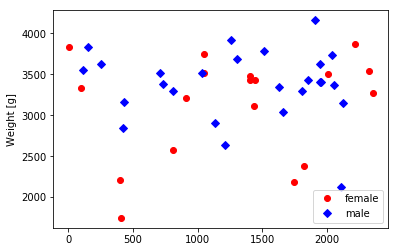

In [74]:
# rozwiązanie Przemka - NIE ROZUMIEM
# This is a bit fancier: scatter plots, with labels and individual symbols
symbols = ['o', 'D']
colors = ['r', 'b']
fig = plt.figure()
ax = fig.add_subplot(111)
# "enumerate" provides a counter, and variables can be assigned names in one step if
# the "for"-loop uses a tuple as input for each loop:
for (ii, (sex, group)) in enumerate(grouped):
    ax.plot(group['Weight'], marker = symbols[ii], linewidth=0, color = colors[ii], label=sex)
ax.legend()
ax.set_ylabel('Weight [g]')
plt.show()

# estymacje gęstości

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


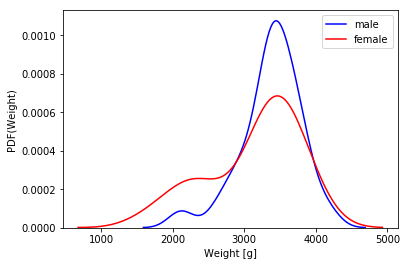

In [83]:
sns.kdeplot(x1, color='b', label='male')
sns.kdeplot(x2, color='r', label='female')
plt.xlabel('Weight [g]')
plt.ylabel('PDF(Weight)')
plt.show()

# histogramy

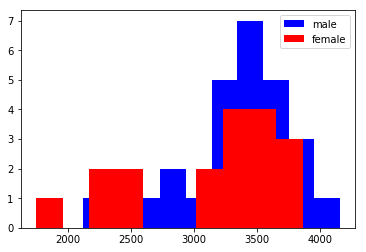

In [134]:
plt.hist(x1, color='b', label='male')
plt.hist(x2, color='r', label='female')
plt.legend(['male', 'female'])
plt.show()

# dystrybuanty empiryczne

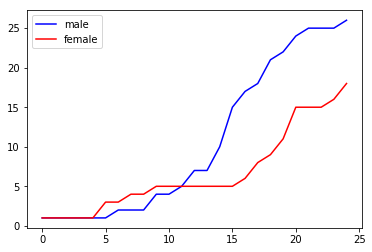

In [119]:
plt.plot(stats.cumfreq(x1, numbins=25)[0],c='b')
plt.plot(stats.cumfreq(x2, numbins=25)[0], c='r')
plt.legend(['male','female'])
plt.show()

# wykresy pudełkowe

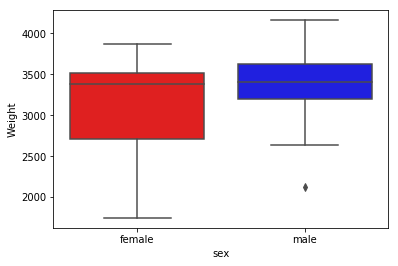

           Minutes       Weight
count    26.000000    26.000000
mean    799.615385  3375.307692
std     402.687281   428.046051
min      78.000000  2121.000000
25%     464.250000  3198.000000
50%     849.500000  3404.000000
75%    1177.500000  3628.750000
max    1283.000000  4162.000000
           Minutes       Weight
count    18.000000    18.000000
mean    773.000000  3132.444444
std     446.050775   631.582534
min       5.000000  1745.000000
25%     507.750000  2711.000000
50%     846.500000  3381.000000
75%    1094.250000  3517.250000
max    1435.000000  3866.000000


In [141]:
# sub_x1 = plt.boxplot(x1)
# sub_x2 = plt.boxplot(x2)
# plt.subplots(sub_x1, sub_x2)
sns.boxplot(x="sex",y="Weight",palette=['r', 'b'], data=df)
plt.show()
print(df[male1].describe())
print(df[female1].describe())

# wykresy skrzypcowe

C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


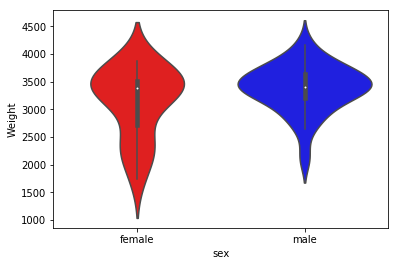

In [132]:
sns.violinplot(x='sex', y='Weight', palette=['r', 'b'], data=df)

# Test: czy próbka pochodzi z rozkładu normalnego 

In [135]:
# Statistics: are the data normally distributed?
def isNormal(data, dataType):
    '''Check if the data are normally distributed'''
    alpha = 0.05
    (k2, pVal) = stats.normaltest(data)
    if pVal < alpha:
        print('{0} are NOT normally distributed.'.format(dataType))
    else:
        print('{0} are normally distributed.'.format(dataType))

In [136]:
isNormal(grouped.get_group('male').Weight, 'male')
isNormal(grouped.get_group('female').Weight, 'female')

male are NOT normally distributed.
female are normally distributed.


C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [137]:
isNormal(x1, 'male')
isNormal(x2, 'female')

male are NOT normally distributed.
female are normally distributed.


C:\Users\Edyta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
